<a href="https://colab.research.google.com/github/Teju-tejaswini/Mini-Project/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#1. Gathering Data

!pip install bing-image-downloader

In [17]:
from bing_image_downloader import downloader
downloader.download('grapes',limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://ericjohnbaker.files.wordpress.com/2014/12/grapes.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gardeningknowhow.com/wp-content/uploads/2013/10/grapes.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://weknowyourdreams.com/images/grapes/grapes-02.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.waimeanurseries.co.nz/assets/Uploads/Grape-green-iStock-000014085833Medium2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i2.wp.com/www.sweetsouthernblue.com/wp-content/uploads/2012/09/grapes.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.gettystewart.com/wp-content/uploads/2014/09/hold-grapes-.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.gettystewart.com/wp-content/uploads/2014/09/blue-grapes.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://www.gardeningknowhow.com/wp-

In [18]:
downloader.download('kitty cat',limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/laienOZtANY/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapertag.com/wallpaper/full/4/0/1/943444-widescreen-kitty-cat-wallpaper-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-ciBjIwfLmsA/UJ_Hm0KPrxI/AAAAAAAAFkM/Ak3X7Vx9dbU/s1600/kitty-cats-kittens-wallpaper-1920x1200-piciple+(17).jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/dbXb1V_BzOA/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i.ytimg.com/vi/GALBaeTd_6Y/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://welovecatsandkittens.com/wp-content/uploads/2018/03/cute-2.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://hdqwalls.com/wallpapers/cute-kitty.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://i.ytimg.com/vi/PF9US5P

In [19]:
downloader.download('sunflower',limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/a/a9/A_sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.almanac.com/sites/default/files/image_nodes/sunflower-1627193_1920.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-EvQYk5Z2ISQ/TV1Y6C9VAlI/AAAAAAAAADA/0PviOUYUjU8/s1600/Sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.agricol.co.z

In [21]:
#2.Preprocessing the data

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
image_data = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['grapes','kitty cat','sunflower']
for i in CATEGORIES:
  num=CATEGORIES.index(i)
  path=os.path.join(DATADIR,i)
  for j in os.listdir(path):
     img_array = imread(os.path.join(path,j))
     img_resized = resize(img_array,(150,150,3))
     flat_data.append(img_resized.flatten()) 
     image_data.append(img_resized)
     target.append(num)

flat_data = np.array(flat_data)
target = np.array(target)
image_data = np.array(image_data)

    
    



In [109]:
#3.Applying SVM using GridSearchCV
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=110)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.001,0.0001]},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 0,
       2, 1, 1, 2, 1])

In [112]:
y_test

array([0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0,
       2, 0, 1, 2, 1])

In [113]:
#4.Evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [114]:
accuracy_score(y_pred,y_test)

0.7777777777777778

In [115]:
confusion_matrix(y_pred,y_test)

array([[5, 1, 0],
       [4, 8, 1],
       [0, 0, 8]])

In [116]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.89      0.62      0.73        13
           2       0.89      1.00      0.94         8

    accuracy                           0.78        27
   macro avg       0.78      0.82      0.78        27
weighted avg       0.81      0.78      0.78        27



In [119]:
#saving the model using pickel library
import pickle
pickle.dump(clf,open('imgclass_model.p','wb'))


In [120]:
model = pickle.load(open('imgclass_model.p','rb'))

In [ ]:
#5.Testing a new image

Please enter the URL:https://th.bing.com/th/id/OIP.2KGoEsKihdbja-L8TNgovAHaFj?w=252&h=189&c=7&o=5&pid=1.7
(189, 252, 3)
The Predicted Output Is : sunflower


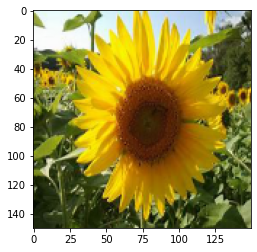

In [123]:
flat_data = []
link = input('Please enter the URL:')
img = imread(link)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print('The Predicted Output Is :',y_out)